In [1]:
library(reticulate)

In [2]:
np <- import("numpy")
mat <- np$load('addons/hepg2_coocc.npy')

In [3]:
labels1 <- np$load('addons/hepg2_coocc_annot.npy')

In [6]:
library(igraph)
library(sankeyD3)
library(networkD3)


In [10]:
rownames(mat) <- labels1
colnames(mat) <- labels1

network <- graph_from_adjacency_matrix(mat , mode='undirected', diag=F,weighted=TRUE )


In [26]:
wc <- cluster_walktrap(network)
members <- membership(wc)
karate_d3 <- igraph_to_networkD3(network,group =members)


In [28]:
data(MisLinks)
data(MisNodes)

[1] 0.1476247

[1] 0.06245945

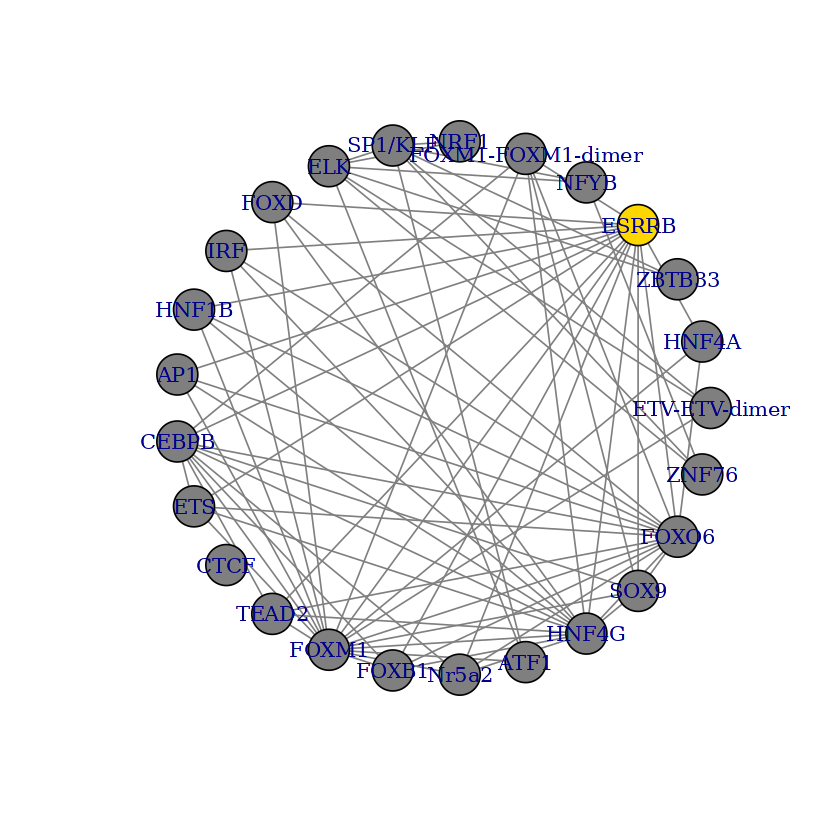

In [61]:
colrs <- c("gray50", "tomato", "gold")

mean(karate_d3$links$value)

sd(karate_d3$links$value)

cut.off <- mean(karate_d3$links$value) 

net.sp <- delete_edges(network, E(network)[weight<cut.off])

la.sp <- layout.circle(net.sp)

plot(net.sp,layout=la.sp)



In [58]:
#karate_d3$links


Attaching package: ‘networkD3’


The following objects are masked from ‘package:sankeyD3’:

    igraph_to_networkD3, JS, renderSankeyNetwork, sankeyNetwork,
    sankeyNetworkOutput, saveNetwork




In [34]:
forceNetwork(Links = karate_d3$links, Nodes = karate_d3$nodes,
            Source = "source", Target = "target",
            Value = "value", NodeID = "name",
            Group = "group", opacity = 1.0)

HTML widgets cannot be represented in plain text (need html)

In [57]:

# Create force directed network plot
sankeyNetwork(Links = karate_d3$links, Nodes = karate_d3$nodes,
             Source = 'source', Target = 'target', NodeID = 'name',
             NodeGroup = 'group')

#plot(network,edge.width=E(network)$weight*2, vertex.label="", vertex.size=deg*5)
## Apply labels manually
#Specify x and y coordinates of labels, adjust outward as desired
#x = network[,1]*1.2
#y = network[,2]*1.2

#create vector of angles for text based on number of nodes (flipping the orientation of the words half way around so none appear upside down)
#angle = ifelse(atan(-(la[,1]/la[,2]))*(180/pi) < 0,  90 + atan(-(la[,1]/la[,2]))*(180/pi), 270 + atan(-la[,1]/la[,2])*(180/pi))

#Apply the text labels with a loop with angle as srt
#for (i in 1:length(x)) {
#	text(x=x[i], y=y[i], labels=labels1[i], adj=NULL, pos=NULL, cex=.7, col="black", xpd=T)
    
#}

HTML widgets cannot be represented in plain text (need html)

Warning message in eattrs[[name]][index] <- value:
“number of items to replace is not a multiple of replacement length”


+ 160/160 edges from b55118b (vertex names):
 [1] ETV-ETV-dimer--ESRRB   ETV-ETV-dimer--SP1/KLF ETV-ETV-dimer--ELK    
 [4] ETV-ETV-dimer--CEBPB   ETV-ETV-dimer--CTCF    ETV-ETV-dimer--FOXM1  
 [7] ETV-ETV-dimer--HNF4G   ETV-ETV-dimer--FOXO6   HNF4A        --ESRRB  
[10] HNF4A        --SP1/KLF HNF4A        --AP1     HNF4A        --CEBPB  
[13] HNF4A        --CTCF    HNF4A        --FOXM1   HNF4A        --HNF4G  
[16] HNF4A        --FOXO6   ZBTB33       --ESRRB   ZBTB33       --NFYB   
[19] ZBTB33       --NRF1    ZBTB33       --SP1/KLF ZBTB33       --ELK    
[22] ZBTB33       --CTCF    ZBTB33       --FOXM1   ZBTB33       --HNF4G  
[25] ESRRB        --NFYB   
+ ... omitted several edges


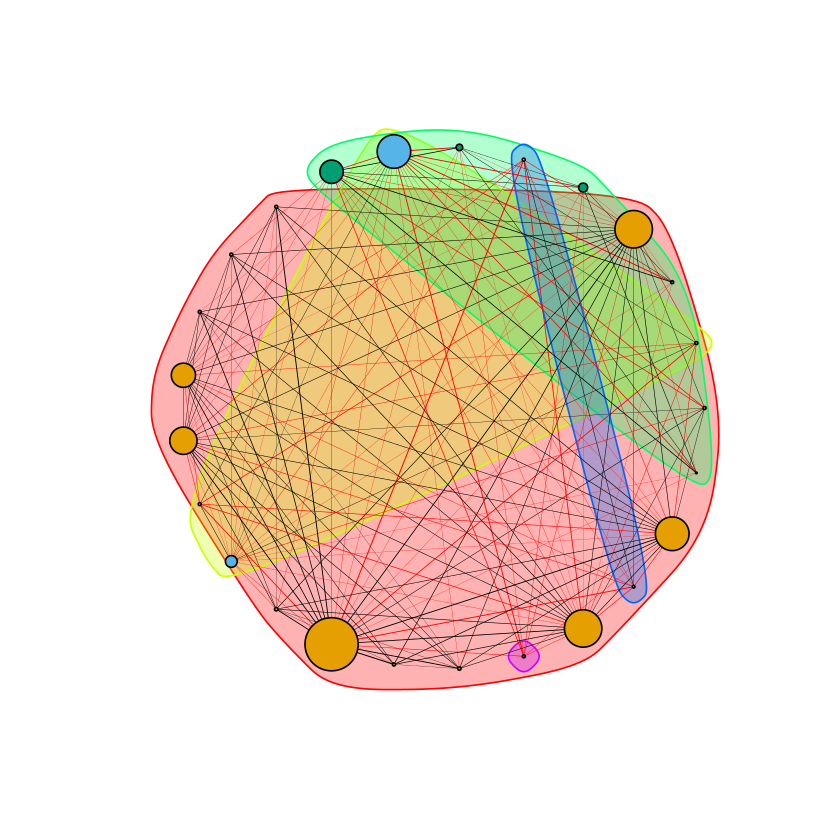

In [43]:
# When ploting, we can use different layouts:
library(ggplot2)
library('RColorBrewer')

#pdf("subfigs/hepg2_cooperativity.pdf")
la <- layout.circle(network)
deg <- colSums(mat)

x2<-rep(c("gray50"),times=25)
y2<-rep(c("gray50"),times=25)

x2[4] = c("gold")

V(network)$color = x2
E(network)$color <- y2
print(E(network))
plot(ceb, network, layout=la, edge.width=E(network)$weight*2, vertex.label="", vertex.size=deg*4)
            
#plot(network, layout=layout.fruchterman.reingold(network,  circular=T),vertex.size=deg*4,edge.width=E(network)$weight)

## Apply labels manually
#Specify x and y coordinates of labels, adjust outward as desired
#x = la[,1]*1.2
#y = la[,2]*1.2

#create vector of angles for text based on number of nodes (flipping the orientation of the words half way around so none appear upside down)
#angle = ifelse(atan(-(la[,1]/la[,2]))*(180/pi) < 0,  90 + atan(-(la[,1]/la[,2]))*(180/pi), 270 + atan(-la[,1]/la[,2])*(180/pi))

#Apply the text labels with a loop with angle as srt
#for (i in 1:length(x)) {
#	text(x=x[i], y=y[i], labels=labels1[i], adj=NULL, pos=NULL, cex=.7, col="black", srt=angle[i], xpd=T)
    
#}

#dev.off()


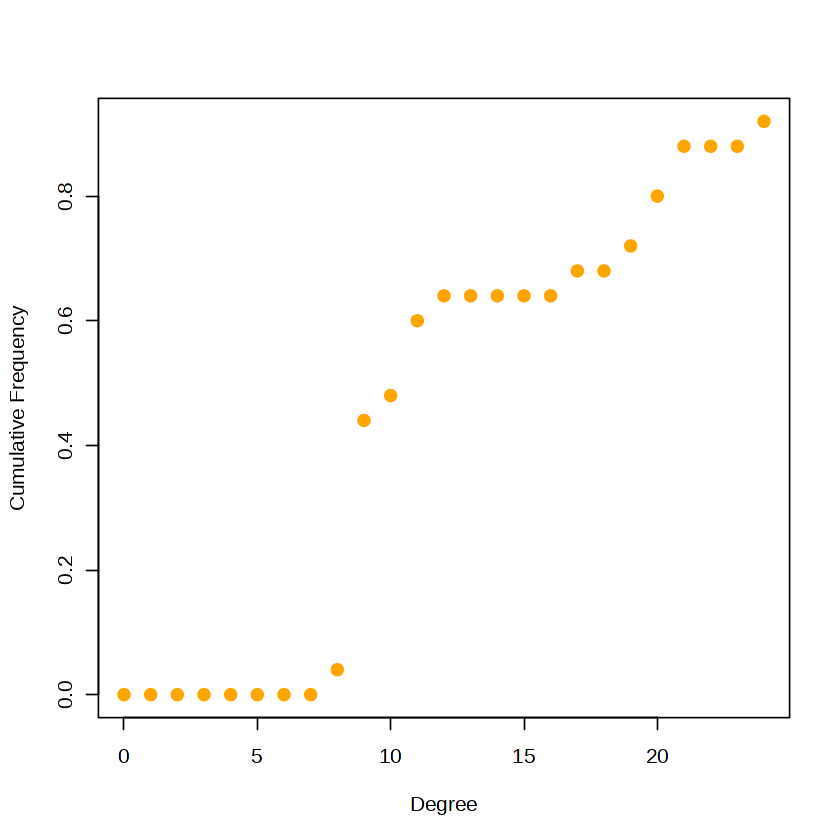

In [7]:
deg1 <- degree(network, mode="all")

deg.dist <- degree_distribution(network, cumulative=T, mode="all")
plot( x=0:max(deg1), y=1-deg.dist, pch=19, cex=1.2, col="orange",
xlab="Degree", ylab="Cumulative Frequency")

In [43]:
# Use igraph to make the graph and find membership
karate <- make_graph("Zachary")
wc <- cluster_walktrap(karate)
members <- membership(wc)

In [48]:
karate

IGRAPH 5761707 U--- 34 78 -- Zachary
+ attr: name (g/c)
+ edges from 5761707:
 [1]  1-- 2  1-- 3  1-- 4  1-- 5  1-- 6  1-- 7  1-- 8  1-- 9  1--11  1--12
[11]  1--13  1--14  1--18  1--20  1--22  1--32  2-- 3  2-- 4  2-- 8  2--14
[21]  2--18  2--20  2--22  2--31  3-- 4  3-- 8  3--28  3--29  3--33  3--10
[31]  3-- 9  3--14  4-- 8  4--13  4--14  5-- 7  5--11  6-- 7  6--11  6--17
[41]  7--17  9--31  9--33  9--34 10--34 14--34 15--33 15--34 16--33 16--34
[51] 19--33 19--34 20--34 21--33 21--34 23--33 23--34 24--26 24--28 24--33
[61] 24--34 24--30 25--26 25--28 25--32 26--32 27--30 27--34 28--34 29--32
[71] 29--34 30--33 30--34 31--33 31--34 32--33 32--34 33--34

In [53]:
# Libraries
library(tidyverse)
library(viridis)
library(patchwork)
library(hrbrthemes)
library(circlize)

# Load dataset from github
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/13_AdjacencyDirectedWeighted.csv", header=TRUE)
# Package
library(networkD3)

# I need a long format
data_long <- data %>%
  rownames_to_column %>%
  gather(key = 'key', value = 'value', -rowname) %>%
  filter(value > 0)
colnames(data_long) <- c("source", "target", "value")
data_long$target <- paste(data_long$target, " ", sep="")

# From these flows we need to create a node data frame: it lists every entities involved in the flow
nodes <- data.frame(name=c(as.character(data_long$source), as.character(data_long$target)) %>% unique())
 
# With networkD3, connection must be provided using id, not using real name like in the links dataframe.. So we need to reformat it.
data_long$IDsource=match(data_long$source, nodes$name)-1 
data_long$IDtarget=match(data_long$target, nodes$name)-1

# prepare colour scale
ColourScal ='d3.scaleOrdinal() .range(["#FDE725FF","#B4DE2CFF","#6DCD59FF","#35B779FF","#1F9E89FF","#26828EFF","#31688EFF","#3E4A89FF","#482878FF","#440154FF"])'

# Make the Network
sankeyNetwork(Links = data_long, Nodes = nodes,
                     Source = "IDsource", Target = "IDtarget",
                     Value = "value", NodeID = "name", 
                     sinksRight=FALSE, colourScale=ColourScal, nodeWidth=40, fontSize=13, nodePadding=20)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
✔ purrr   0.3.5     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
✖ purrr::compose()       masks igraph::compose()
✖ tidyr::crossing()      masks igraph::crossing()
✖ dplyr::filter()        masks stats::filter()
✖ dplyr::groups()        masks igraph::groups()
✖ dplyr::lag()           masks stats::lag()
✖ purrr::simplify()      masks igraph::simplify()
Loading required package: viridisLite

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_

ERROR: Error in library(networkD3): there is no package called ‘networkD3’
